In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
def get_data(n=70, d=2, seed=0):
	np.random.seed(seed)
	X = np.random.randn(n, d)
	Y = np.random.randint(0, d, n)
	return X, Y

In [3]:
X, Y = get_data(n=30, d=2, seed=42)
x_test = np.random.randn(2)

x_test

array([-0.39863839, -0.06086409])

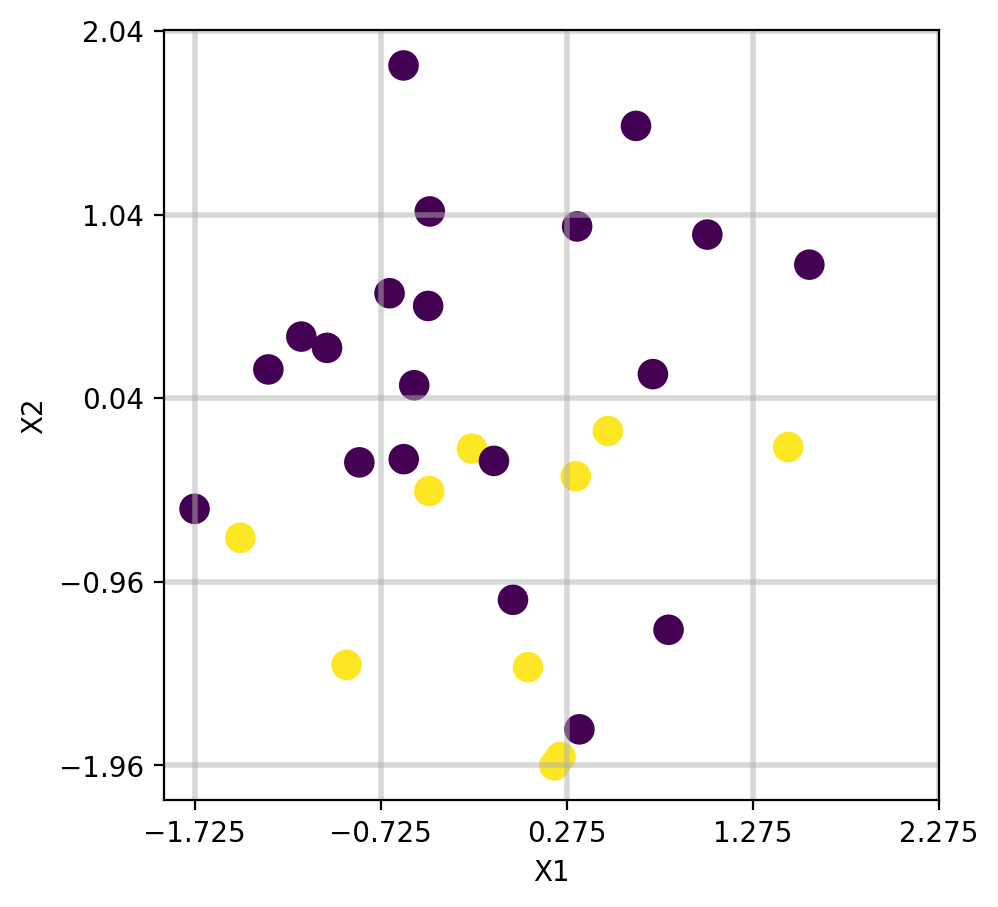

In [4]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(X[:, 0], X[:, 1], c=Y, s=100)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.grid(True, which='both', axis='both', linestyle='-', linewidth=2, alpha=0.5)
ax.set_xticks(np.arange(min(X[:, 0]), max(X[:, 0])+1, 1))
ax.set_yticks(np.arange(min(X[:, 1]), max(X[:, 1])+1, 1))
plt.show()

# Naive Knn

In [2]:
# Implement Naive Knn.
class naive_knn():
	def __init__(self, method='knn',k=3, p=2, l=3, max_depth=3):
		self.k = k
		self.p = p
		self.l = l
		self.max_depth = max_depth
		self.method = method
		
	def fit_knn(self):
		pass

	def predict_knn(self, x, nearest_neighbors=False):
		dist = np.linalg.norm(self.X - x, axis=1)
		idx = np.argsort(dist, axis=0)[:self.k]
		if nearest_neighbors:
			return self.X[idx]
		return stats.mode(self.Y[idx], axis=0).mode

	fit_funcs = {"knn": fit_knn}
	pred_funcs = {"knn": predict_knn}

	def fit(self, X, Y):
		self.X = X
		self.Y = Y
		self.fit_funcs[self.method](self)

	def predict(self, x, nearest_neighbors=False):
		return self.pred_funcs[self.method](self, x, nearest_neighbors)
	
	def plot_dataset(self, nearest_points, query_pt):
		fig, ax = plt.subplots(figsize=(5, 5))
		ax.scatter(self.X[:, 0], self.X[:, 1], c=self.Y, s=100)
		ax.set_xlabel('X1')
		ax.set_ylabel('X2')
		ax.grid(True, which='both', axis='both', linestyle='--', linewidth=1, alpha=0.5)
		ax.set_xticks(np.arange(min(self.X[:, 0]), max(self.X[:, 0])+1, 1))
		ax.set_yticks(np.arange(min(self.X[:, 1]), max(self.X[:, 1])+1, 1))
		for point in nearest_points:
			ax.plot([query_pt[0], point[0]], [query_pt[1], point[1]], '', linewidth=2)
			ax.scatter(point[0], point[1], color='red', s=20)
		ax.scatter(query_pt[0], query_pt[1], color='black', s=100)
		plt.show()

	
	def visualize(self, query_pt):
		nearest_points = self.predict(query_pt, nearest_neighbors=True)
		self.method == "knn"
		self.plot_dataset(nearest_points, query_pt)

	

In [6]:
knn = naive_knn(k=3, method="knn")
knn.fit(X, Y)
for x in X:
	print(x, knn.predict([x]))

[ 0.49671415 -0.1382643 ] 1
[0.64768854 1.52302986] 0
[-0.23415337 -0.23413696] 1
[1.57921282 0.76743473] 0
[-0.46947439  0.54256004] 0
[-0.46341769 -0.46572975] 1
[ 0.24196227 -1.91328024] 1
[-1.72491783 -0.56228753] 0
[-1.01283112  0.31424733] 0
[-0.90802408 -1.4123037 ] 1
[ 1.46564877 -0.2257763 ] 1
[ 0.0675282  -1.42474819] 0
[-0.54438272  0.11092259] 0
[-1.15099358  0.37569802] 0
[-0.60063869 -0.29169375] 0
[-0.60170661  1.85227818] 0
[-0.01349722 -1.05771093] 1
[ 0.82254491 -1.22084365] 0
[ 0.2088636  -1.95967012] 1
[-1.32818605  0.19686124] 0
[0.73846658 0.17136828] 1
[-0.11564828 -0.3011037 ] 1
[-1.47852199 -0.71984421] 0
[-0.46063877  1.05712223] 0
[ 0.34361829 -1.76304016] 1
[ 0.32408397 -0.38508228] 1
[-0.676922    0.61167629] 0
[1.03099952 0.93128012] 0
[-0.83921752 -0.30921238] 0
[0.33126343 0.97554513] 0


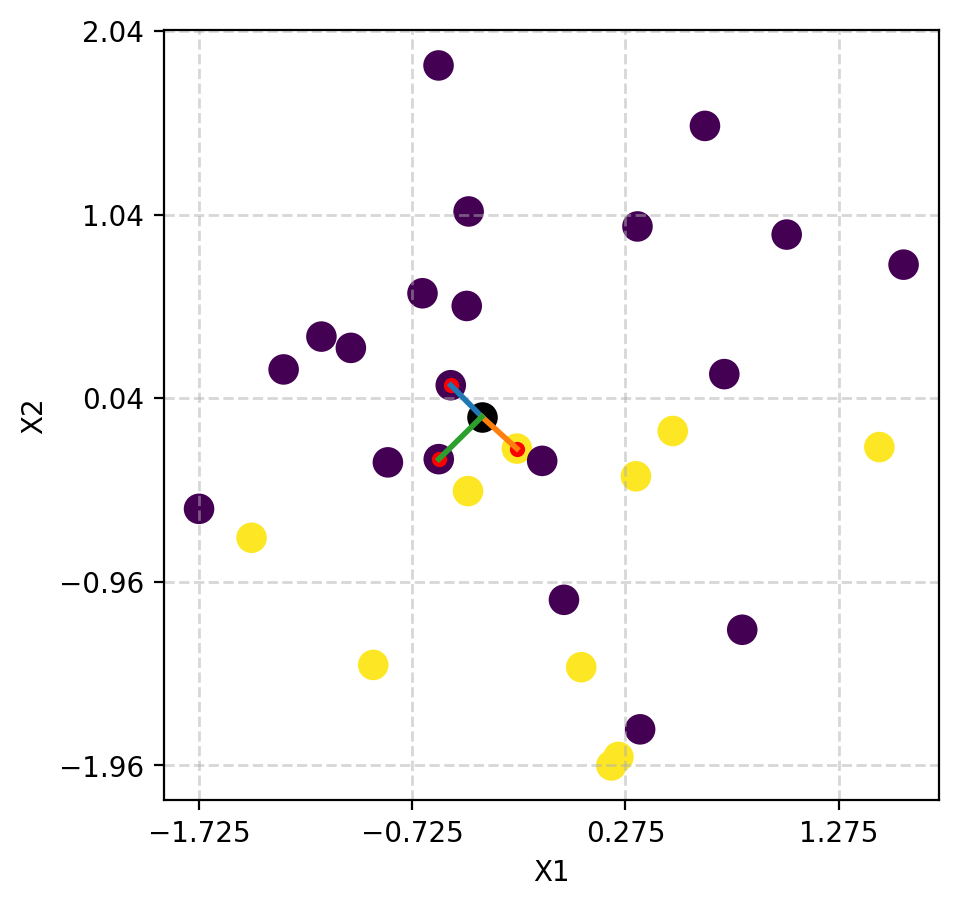

In [7]:
knn.visualize(x_test)

# KD TREE

In [3]:
class KNN():
	class Node():
		def __init__(self, median=None, split_dim=None, left=None, right=None, points=None):
			self.median = median
			self.split_dim = split_dim
			self.left = left
			self.right = right
			self.points = points
			self.is_leaf = left is None and right is None
	class KDTree():
		def __init__(self, X, Y, max_depth=3):
			self.X = X
			self.Y = Y
			self.root = None
			self.max_depth = max_depth
			self.split_dims = np.random.permutation(X.shape[1])
			self.dims = X.shape[1]

		def build_tree(self, X, Y, max_depth):
			if len(X) == 0:
				return None
			if max_depth == 0 or len(X) == 1:
				return KNN.Node(points = (X, Y))
			split_dim = self.split_dims[max_depth % self.dims]
			median = np.median(X[:, split_dim])
			left = X[:, split_dim] < median
			right = X[:, split_dim] >= median

			return KNN.Node(median, split_dim, self.build_tree(X[left], Y[left], max_depth - 1), self.build_tree(X[right], Y[right], max_depth - 1))

		def query(self, x, k):
			x_vals, best = self.query_recursive(self.root, x, k)
			return x_vals, best
		
		def query_recursive(self, node, x, k):
			if node.is_leaf:
				dist = np.linalg.norm(node.points[0] - x, axis=1)
				idx = np.argsort(dist, axis=0)
				if len(idx) > k:
					idx = idx[:k]
				best = sorted([(dist[i], node.points[1][i]) for i in idx])
				x_vals = node.points[0][idx]
				
				return x_vals, best
			if x[node.split_dim] < node.median:
				x_vals, best = self.query_recursive(node.left, x, k)
			else:
				x_vals, best = self.query_recursive(node.right, x, k)
				
			return x_vals, best
		
		def visualize(self, nearest_points, query_pt):
			fig, ax = plt.subplots(figsize=(5, 5))
			ax.scatter(self.X[:, 0], self.X[:, 1], c=self.Y, s=100)
			ax.set_xlabel('X1')
			ax.set_ylabel('X2')
			ax.grid(True, which='both', axis='both', linestyle='--', linewidth=1, alpha=0.5)
			ax.set_xticks(np.arange(min(self.X[:, 0]), max(self.X[:, 0])+1, 1))
			ax.set_yticks(np.arange(min(self.X[:, 1]), max(self.X[:, 1])+1, 1))
			for point in nearest_points:
				ax.plot([query_pt[0], point[0]], [query_pt[1], point[1]], '', linewidth=2)
				ax.scatter(point[0], point[1], color='red', s=20)
			ax.scatter(query_pt[0], query_pt[1], color='black', s=100)
			self.plot_tree(self.root,ax)
			plt.show()

		def plot_tree(self,node,ax, prev_split_dim=[], prev_median=[], prev_split_direction=[],first=True):
			if node.is_leaf:
				return
			
			split_dim = node.split_dim
			median = node.median
			all_prev_split_dim,all_prev_median = prev_split_dim,prev_median
			split_direction = prev_split_direction
			if split_dim==0:
				max_limit = self.X[:,0].max()
				min_limit = self.X[:,0].min()
				for sd in range(len(all_prev_split_dim)):
					if all_prev_split_dim[sd]==1:
						if split_direction[sd]=='left':
							if max_limit>=all_prev_median[sd]:
								max_limit = all_prev_median[sd]
						else:
							if min_limit<=all_prev_median[sd]:
								min_limit = all_prev_median[sd]	
				if first:
					max_limit += 1
				y_values = np.linspace(min_limit,max_limit,10)
				ax.plot([median]*len(y_values),y_values, linestyle="--", linewidth=1,color='red')
			else:
				max_limit = self.X[:,1].max()
				min_limit = self.X[:,1].min()
				for sd in range(len(all_prev_split_dim)):
					if all_prev_split_dim[sd]==0:
						if split_direction[sd]=='left':
							if max_limit>=all_prev_median[sd]:
								max_limit = all_prev_median[sd]
						else:
							if min_limit<=all_prev_median[sd]:
								min_limit = all_prev_median[sd]
				if first:
					max_limit += 1
				x_values = np.linspace(min_limit,max_limit,10)
				ax.plot(x_values,[median]*len(x_values), linestyle="--", linewidth=1,color='red')
			if node.left is not None:
				self.plot_tree(node.left,ax, prev_split_dim+[split_dim], prev_median+[median], prev_split_direction+["left"],first=False)
			if node.right is not None:
				self.plot_tree(node.right,ax, prev_split_dim+[split_dim], prev_median+[median], prev_split_direction+["right"],first=False)


	def __init__(self, k=3, method="kd_tree", max_depth=3, p=2, l=3):
		self.k = k
		self.method = method
		self.max_depth = max_depth
		self.p = p
		self.l = l

	def fit_kd_tree(self):
		self.tree = self.KDTree(self.X, self.Y, self.max_depth)
		self.tree.root = self.tree.build_tree(self.X, self.Y, self.max_depth)

	def pred_kd_tree(self, x, nearest_neighbors=False):
		x_vals, points = self.tree.query(x, self.k)
		if nearest_neighbors:
			return x_vals
		preds = np.array(points)[:, 1]
		return stats.mode(preds, axis=0).mode

	fit_funcs = {"kd_tree": fit_kd_tree}
	pred_funcs = { "kd_tree": pred_kd_tree}

	def fit(self, X, Y):
		self.X = X
		self.Y = Y
		self.fit_funcs[self.method](self)

	def predict(self, x, nearest_neighbors=False):
		return self.pred_funcs[self.method](self, x, nearest_neighbors)

	
	def visualize(self, query_pt):
		nearest_points = self.predict(query_pt, nearest_neighbors=True)
		self.method == "kd_tree"
		self.tree.visualize(nearest_points, query_pt)


In [9]:
kdtree = KNN(k=3, method="kd_tree", max_depth=2)
kdtree.fit(X, Y)
for x in X:
	print(x, kdtree.predict(x))

[ 0.49671415 -0.1382643 ] 1.0
[0.64768854 1.52302986] 0.0
[-0.23415337 -0.23413696] 1.0
[1.57921282 0.76743473] 0.0
[-0.46947439  0.54256004] 0.0
[-0.46341769 -0.46572975] 1.0
[ 0.24196227 -1.91328024] 1.0
[-1.72491783 -0.56228753] 0.0
[-1.01283112  0.31424733] 0.0
[-0.90802408 -1.4123037 ] 1.0
[ 1.46564877 -0.2257763 ] 1.0
[ 0.0675282  -1.42474819] 0.0
[-0.54438272  0.11092259] 0.0
[-1.15099358  0.37569802] 0.0
[-0.60063869 -0.29169375] 0.0
[-0.60170661  1.85227818] 0.0
[-0.01349722 -1.05771093] 1.0
[ 0.82254491 -1.22084365] 0.0
[ 0.2088636  -1.95967012] 1.0
[-1.32818605  0.19686124] 0.0
[0.73846658 0.17136828] 0.0
[-0.11564828 -0.3011037 ] 0.0
[-1.47852199 -0.71984421] 0.0
[-0.46063877  1.05712223] 0.0
[ 0.34361829 -1.76304016] 1.0
[ 0.32408397 -0.38508228] 0.0
[-0.676922    0.61167629] 0.0
[1.03099952 0.93128012] 0.0
[-0.83921752 -0.30921238] 0.0
[0.33126343 0.97554513] 0.0


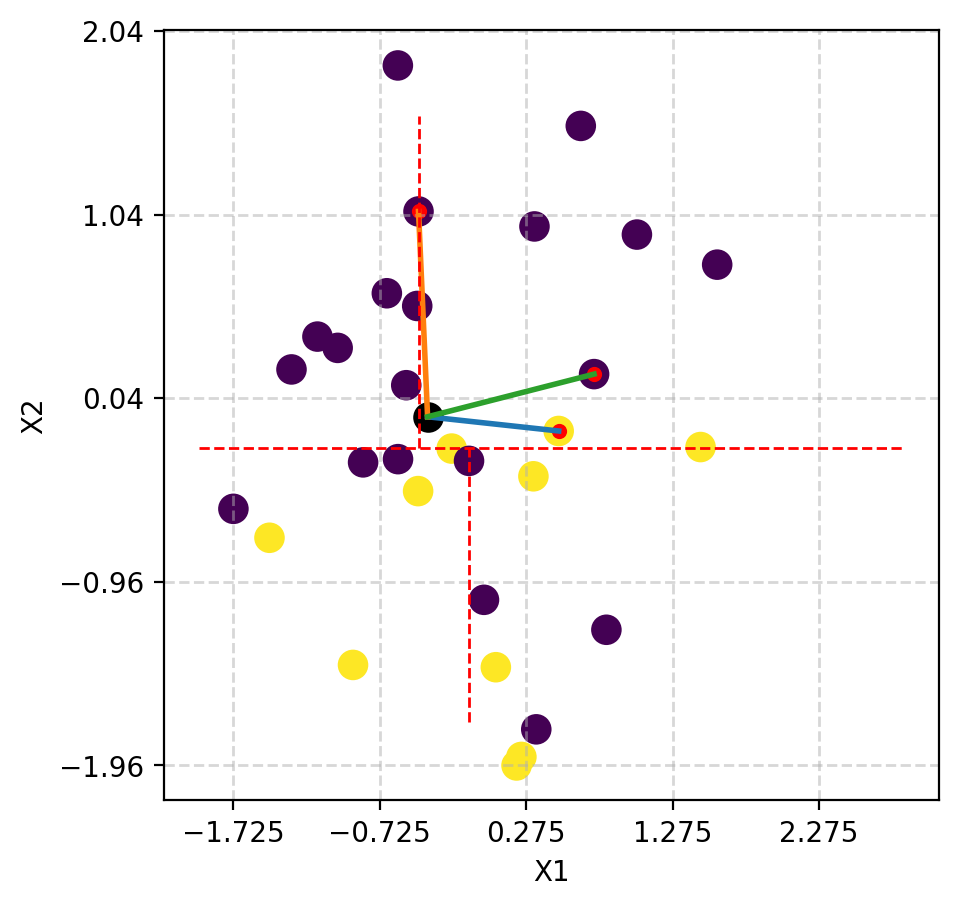

In [10]:
kdtree.visualize(x_test)



# LSH 

In [4]:
class KNN():
	class Node():
		def __init__(self, median=None, split_dim=None, left=None, right=None, points=None):
			self.median = median
			self.split_dim = split_dim
			self.left = left
			self.right = right
			self.points = points
			self.is_leaf = left is None and right is None

	class LSH():
		def __init__(self, X, Y, p=2, l=1, k=3):
			self.X = X
			self.Y = Y
			self.p = p
			self.l = l
			self.k = k
			self.hashes = {}
			self.tables = []
			self.build_tables()
			
		def build_tables(self):
			R = np.random.randn(self.p, self.X.shape[1] + 1)
			self.tables = R
			x_aug = np.concatenate((np.ones((self.X.shape[0], 1)), self.X), axis=1)
			signs = np.sign(np.dot(R, x_aug.T)).T.astype(int)
			unique_hashes = np.unique(signs, axis=0)
			for hash in unique_hashes:
				self.hashes[tuple(hash.tolist())] = (self.X[np.all(signs == hash, axis=1)], self.Y[np.all(signs == hash, axis=1)])
		
		def query(self, x, k):
			x_aug = np.concatenate(([1], x)).reshape(1, -1)
			hash = np.sign(np.dot(self.tables, x_aug.T)).T.astype(int).reshape(-1)
			x_vals, y_vals = self.hashes[tuple(hash.tolist())]
			dist = np.linalg.norm(x_vals - x, axis=1)
			idx = np.argsort(dist, axis=0)
			if len(idx) > k:
				idx = idx[:k]
			return x_vals[idx], y_vals[idx]
		
		def visualize(self, nearest_points, query_pt):
			fig, ax = plt.subplots(figsize=(5, 5))
			ax.scatter(self.X[:, 0], self.X[:, 1], c=self.Y, s=100)
			ax.set_xlabel('X1')
			ax.set_ylabel('X2')
			ax.grid(True, which='both', axis='both', linestyle='--', linewidth=1, alpha=0.5)
			x1_min, x1_max = self.X[:, 0].min(), self.X[:, 0].max()
			ax.set_xticks(np.arange(min(self.X[:, 0]), max(self.X[:, 0])+1, 1))
			ax.set_yticks(np.arange(min(self.X[:, 1]), max(self.X[:, 1])+1, 1))
			for point in nearest_points:
				ax.plot([query_pt[0], point[0]], [query_pt[1], point[1]], '', linewidth=2)
				ax.scatter(point[0], point[1], color='red', s=20)
			for i in range(len(self.tables)):
				plane = self.tables[i]
				x1 = np.array([x1_min, x1_max])
				x2 = (-plane[0] - plane[1] * x1) / plane[2]
				ax.plot(x1, x2, linestyle="--", linewidth=1, color='red')
			ax.scatter(query_pt[0], query_pt[1], color='black', s=100)
			# maximum y height for the plot is 1
			ax.set_ylim(-2.25, 2.25)
			plt.show()

	def __init__(self, k=3, method="lsh", max_depth=3, p=2, l=3):
		self.k = k
		self.method = method
		self.max_depth = max_depth
		self.p = p
		self.l = l

	def fit_lsh(self):
		self.lsh = self.LSH(self.X, self.Y, self.p, self.l, self.k)

	def pred_lsh(self, X, nearest_neighbors=False):
		x_vals, points = self.lsh.query(X, self.k)
		if nearest_neighbors:
			return x_vals
		preds = np.array(points)
		return stats.mode(preds, axis=0).mode
		
	fit_funcs = { "lsh": fit_lsh}
	pred_funcs = {"lsh": pred_lsh}

	def fit(self, X, Y):
		self.X = X
		self.Y = Y
		self.fit_funcs[self.method](self)

	def predict(self, x, nearest_neighbors=False):
		return self.pred_funcs[self.method](self, x, nearest_neighbors)
		
	def visualize(self, query_pt):
		nearest_points = self.predict(query_pt, nearest_neighbors=True)
		self.method == "lsh"
		self.lsh.visualize(nearest_points, query_pt)

In [12]:
lsh = KNN(k=3, method="lsh", p=2, l=1)
lsh.fit(X, Y)
for x in X:
	print(x, lsh.predict(x))

[ 0.49671415 -0.1382643 ] 1
[0.64768854 1.52302986] 0
[-0.23415337 -0.23413696] 1
[1.57921282 0.76743473] 0
[-0.46947439  0.54256004] 0
[-0.46341769 -0.46572975] 1
[ 0.24196227 -1.91328024] 1
[-1.72491783 -0.56228753] 0
[-1.01283112  0.31424733] 0
[-0.90802408 -1.4123037 ] 1
[ 1.46564877 -0.2257763 ] 1
[ 0.0675282  -1.42474819] 0
[-0.54438272  0.11092259] 0
[-1.15099358  0.37569802] 0
[-0.60063869 -0.29169375] 0
[-0.60170661  1.85227818] 0
[-0.01349722 -1.05771093] 1
[ 0.82254491 -1.22084365] 0
[ 0.2088636  -1.95967012] 1
[-1.32818605  0.19686124] 0
[0.73846658 0.17136828] 0
[-0.11564828 -0.3011037 ] 1
[-1.47852199 -0.71984421] 1
[-0.46063877  1.05712223] 0
[ 0.34361829 -1.76304016] 1
[ 0.32408397 -0.38508228] 1
[-0.676922    0.61167629] 0
[1.03099952 0.93128012] 0
[-0.83921752 -0.30921238] 0
[0.33126343 0.97554513] 0


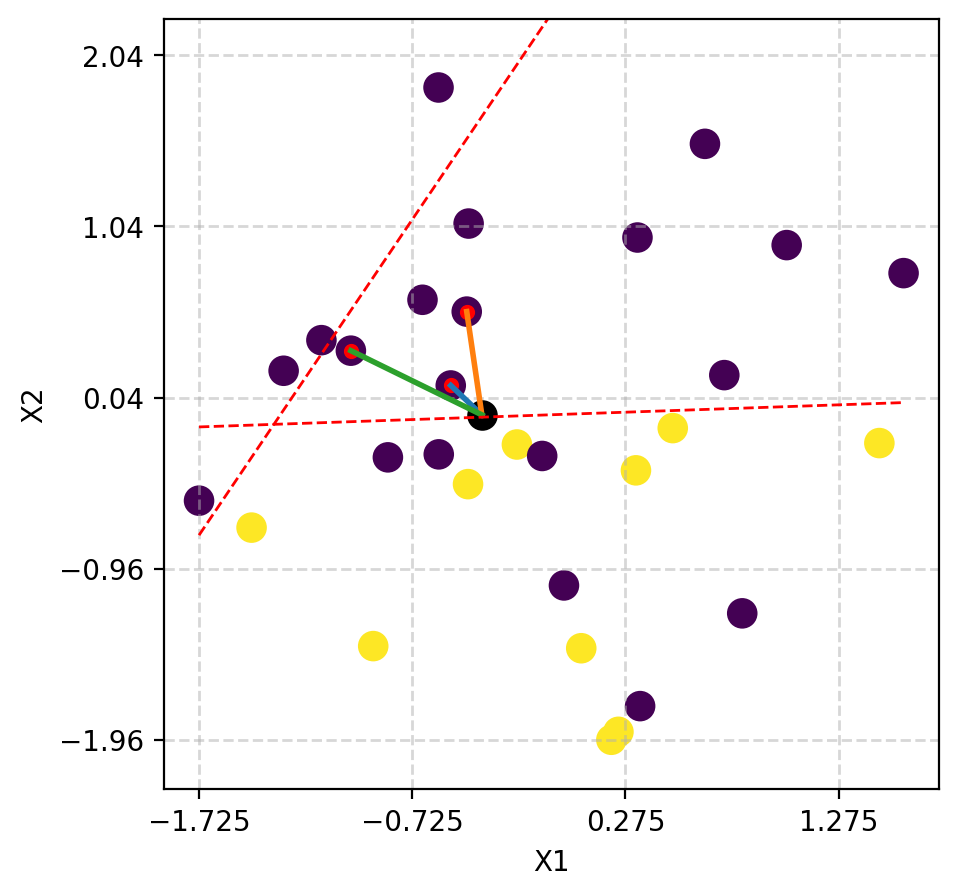

In [13]:
lsh.visualize(x_test)

<img src="knn.png" alt="KNN" width="333"/>  <img src="kdtree.png" alt="KDTREE" width="333"/>  <img src="lsh.png" alt="LSH" width="333"/>


In [5]:
import numpy as np
import plotly.graph_objects as go
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
import time
import psutil
from ipywidgets import IntSlider, VBox, Dropdown, Output, interact

# Create the figure as a FigureWidget to update in place
fig = go.FigureWidget()

# Initialize empty traces for fit and predict times for each method
fig.add_trace(go.Scatter(name='KNN (Naive) - Fit Time', mode='lines+markers'))
fig.add_trace(go.Scatter(name='KNN (Naive) - Predict Time', mode='lines+markers'))
fig.add_trace(go.Scatter(name='KD-Tree - Fit Time', mode='lines+markers'))
fig.add_trace(go.Scatter(name='KD-Tree - Predict Time', mode='lines+markers'))
fig.add_trace(go.Scatter(name='LSH - Fit Time', mode='lines+markers'))
fig.add_trace(go.Scatter(name='LSH - Predict Time', mode='lines+markers'))

# Configure layout for better readability
fig.update_layout(
    title="KNN Method Timing Comparison",
    xaxis_title="Operation (Fit/Predict)",
    yaxis_title="Time (s, Log Scale)",
    xaxis=dict(tickvals=[0, 1], ticktext=["Fit Time", "Predict Time"]),
    yaxis_type="log"
)

# Create an Output widget to display the times taken for fitting and predicting
output = Output()

# Function to update the plot based on widget values
def update_plot(N, D, k, phase):
    # Generate random data
    data = np.random.rand(N, D)
    query_point = np.random.rand(1, D)

    # Train/Test Split
    X_train, X_test = train_test_split(data, test_size=0.3, random_state=42)
    query_point = X_test[0].reshape(1, -1)  # Picking one point from the test set for prediction

    # Dictionary to store times for each method
    times = {
        "KNN (Naive)": {"Fit Time": 0, "Predict Time": 0, "Fit Memory": 0, "Predict Memory": 0},
        "KD-Tree": {"Fit Time": 0, "Predict Time": 0, "Fit Memory": 0, "Predict Memory": 0},
        "LSH": {"Fit Time": 0, "Predict Time": 0, "Fit Memory": 0, "Predict Memory": 0},
    }

    # Function to measure memory usage
    def get_memory_usage():
        process = psutil.Process()
        return process.memory_info().rss / 1024 / 1024  # Memory in MB

    # KNN Naive-Force
    start_time = time.time()
    start_mem = get_memory_usage()
    knn = NearestNeighbors(n_neighbors=k, algorithm='brute').fit(X_train)
    times["KNN (Naive)"]["Fit Time"] = time.time() - start_time
    times["KNN (Naive)"]["Fit Memory"] = max(0, get_memory_usage() - start_mem)  # Avoid negative memory

    start_time = time.time()
    start_mem = get_memory_usage()
    knn.kneighbors(query_point)
    times["KNN (Naive)"]["Predict Time"] = time.time() - start_time
    times["KNN (Naive)"]["Predict Memory"] = max(0, get_memory_usage() - start_mem)  # Avoid negative memory

    # KD-Tree
    start_time = time.time()
    start_mem = get_memory_usage()
    kd_tree = NearestNeighbors(n_neighbors=k, algorithm='kd_tree').fit(X_train)
    times["KD-Tree"]["Fit Time"] = time.time() - start_time
    times["KD-Tree"]["Fit Memory"] = max(0, get_memory_usage() - start_mem)  # Avoid negative memory

    start_time = time.time()
    start_mem = get_memory_usage()
    kd_tree.kneighbors(query_point)
    times["KD-Tree"]["Predict Time"] = time.time() - start_time
    times["KD-Tree"]["Predict Memory"] = max(0, get_memory_usage() - start_mem)  # Avoid negative memory

    # LSH Approximation (using ball_tree for illustration)
    start_time = time.time()
    start_mem = get_memory_usage()
    lsh = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(X_train)
    times["LSH"]["Fit Time"] = time.time() - start_time
    times["LSH"]["Fit Memory"] = max(0, get_memory_usage() - start_mem)  # Avoid negative memory

    start_time = time.time()
    start_mem = get_memory_usage()
    lsh.kneighbors(query_point)
    times["LSH"]["Predict Time"] = time.time() - start_time
    times["LSH"]["Predict Memory"] = max(0, get_memory_usage() - start_mem)  # Avoid negative memory

    # Update the plot in place with the new timing data
    with fig.batch_update():  # Update all traces at once
        fig.data[0].y = [times["KNN (Naive)"]["Fit Time"], times["KNN (Naive)"]["Predict Time"]]
        fig.data[1].y = [times["KNN (Naive)"]["Fit Time"], times["KNN (Naive)"]["Predict Time"]]
        fig.data[2].y = [times["KD-Tree"]["Fit Time"], times["KD-Tree"]["Predict Time"]]
        fig.data[3].y = [times["KD-Tree"]["Fit Time"], times["KD-Tree"]["Predict Time"]]
        fig.data[4].y = [times["LSH"]["Fit Time"], times["LSH"]["Predict Time"]]
        fig.data[5].y = [times["LSH"]["Fit Time"], times["LSH"]["Predict Time"]]
        
        fig.layout.title.text = f"KNN Method Timing Comparison (N={N}, D={D}, K={k}, Phase={phase})"

    # Display the times and memory usage in the output widget
    with output:
        output.clear_output(wait=True)  # Clear the previous output
        print(f"Fit and Predict Times and Memory Usage (in seconds and MB) for N={N}, D={D}, K={k}, Phase={phase}:")
        for method in times:
            print(f"\n{method}:")
            print(f"  Fit Time: {times[method]['Fit Time']:.6f} seconds")
            print(f"  Predict Time: {times[method]['Predict Time']:.6f} seconds")
            print(f"  Fit Memory: {times[method]['Fit Memory']:.6f} MB")
            print(f"  Predict Memory: {times[method]['Predict Memory']:.6f} MB")

# Sliders for dataset size, dimensions, and number of neighbors
N_slider = IntSlider(value=100, min=100, max=10000, step=100, description='Dataset Size (N)')
D_slider = IntSlider(value=2, min=2, max=200, step=2, description='Dimensions (D)')
K_slider = IntSlider(value=5, min=1, max=50, step=1, description='Neighbors (K)')

# Dropdown for selecting training or testing
phase_dropdown = Dropdown(options=['Training', 'Testing'], value='Testing', description='Phase')

# Connect the update function to the sliders using interact
interact(update_plot, N=N_slider, D=D_slider, k=K_slider, phase=phase_dropdown)

# Display the single interactive figure and sliders with output text below
VBox([fig, N_slider, D_slider, K_slider, phase_dropdown, output])


interactive(children=(IntSlider(value=100, description='Dataset Size (N)', max=10000, min=100, step=100), IntS…

    'data': [{'mode': 'lines+markers',
              'name': 'KNN (Naive) - Fit …